# Digit Recognizer

Import the required libraries

In [6]:
import numpy as np 
import tensorflow as tf
import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
!ls digit-recognizer

sample_submission.csv test.csv              train.csv


In [44]:
train = pd.read_csv("digit-recognizer/train.csv")
test = pd.read_csv("digit-recognizer/test.csv")

In [45]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
train.label.count()

42000

In [47]:
y_train = train["label"]

In [48]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

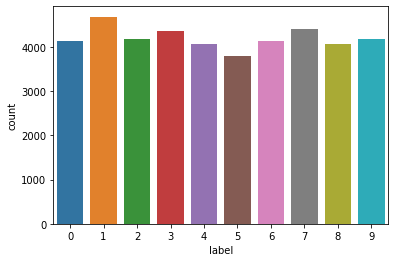

In [49]:
sns.countplot(y_train)

In [50]:
x_train = train.drop(labels = ["label"],axis = 1)

In [51]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [52]:
x_train.describe()
## Values range between 0 and 255 so in order to have a faster rate of convergence we normalize the values to between 0 and 1.

x_train = x_train/255.0
test = test/255.0 ## We apply the transformation to the test as well to maintain consistency

In [53]:
# The data has been inputted as a 784 continous pixel value but we need 28x28x1 pixelexpixelsxchannel

x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [59]:
print(x_train.shape)

(42000, 28, 28, 1)
